# Load Dataset from Google Drive

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
# !unzip  drive/Shareddrives/Bangkit\ Capstone/leaf_datasets.zip -d .

Mounted at /content/drive


# Import Libraries

In [4]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt

In [5]:
import glob as gb
def img_count_in_folder(FOLDER_PATH):  
  print('-'*70)
  for folder in os.listdir(FOLDER_PATH):
    files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
    print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')
  print('-'*70)

In [39]:
# def list_images():
#   classes_dirs = os.listdir(train_dir)
#   for folder in classes_dirs:
#     train_classes = os.listdir(os.path.join(train_dir, folder))
#     validation_classes = os.listdir(os.path.join(validation_dir, folder))
#     test_classes = os.listdir(os.path.join(test_dir, folder))
#     print(f"{folder}: \n \t{len(train_classes)} train images, {len(validation_classes)} validation images, and {len(test_classes)} test images,  total {len(train_classes) + len(validation_classes) + len(test_classes)} images")
#     print()
# list_images()

In [7]:
dataset_dir = f"/content/drive/Shareddrives/Bangkit Capstone/Final_Split_Datasets"
train_dir = os.path.join(dataset_dir, "train")
validation_dir = os.path.join(dataset_dir, "validation")
test_dir = os.path.join(dataset_dir, "test")

In [8]:
# Load the first example of a horse
pepaya_class = os.path.join(train_dir, 'Pepaya')
sample_image  = load_img(f"{os.path.join(pepaya_class, os.listdir(pepaya_class)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (500, 500, 3)


In [10]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='sparse',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='sparse',
                                                                target_size=(224, 224))

  test_datagen = ImageDataGenerator(rescale= 1./255.)

  test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                                batch_size=32,
                                                                shuffle=False, 
                                                                class_mode='sparse',
                                                                target_size=(224, 224))
  return train_generator, validation_generator, test_generator

In [11]:
train_generator, validation_generator, test_generator = train_val_generators(train_dir, validation_dir, test_dir)

Found 1790 images belonging to 11 classes.
Found 497 images belonging to 11 classes.
Found 261 images belonging to 11 classes.


In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop

def create_model():

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
  ])

  
  model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model

In [62]:
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 26, 26, 64)      

In [65]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
56/56 [==============================] - 94s 2s/step - loss: 2.1049 - accuracy: 0.2872 - val_loss: 1.9322 - val_accuracy: 0.3642
Epoch 2/15
56/56 [==============================] - 91s 2s/step - loss: 1.8041 - accuracy: 0.3916 - val_loss: 1.6588 - val_accuracy: 0.4245
Epoch 3/15
56/56 [==============================] - 90s 2s/step - loss: 1.6656 - accuracy: 0.4156 - val_loss: 1.5382 - val_accuracy: 0.4588
Epoch 4/15
56/56 [==============================] - 90s 2s/step - loss: 1.5525 - accuracy: 0.4520 - val_loss: 1.5910 - val_accuracy: 0.4708
Epoch 5/15
56/56 [==============================] - 91s 2s/step - loss: 1.5214 - accuracy: 0.4737 - val_loss: 1.4756 - val_accuracy: 0.4668
Epoch 6/15
56/56 [==============================] - 91s 2s/step - loss: 1.4282 - accuracy: 0.5050 - val_loss: 1.4330 - val_accuracy: 0.4990
Epoch 7/15
56/56 [==============================] - 92s 2s/step - loss: 1.3716 - accuracy: 0.5235 - val_loss: 1.4207 - val_accuracy: 0.5091
Epoch 8/15
56/56 [==

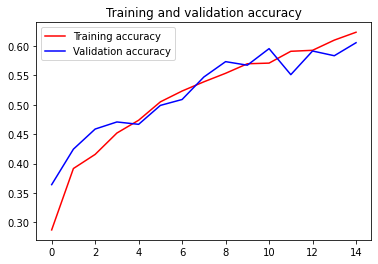

<Figure size 432x288 with 0 Axes>

In [66]:
def plot_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()
  
  plt.show()

plot_loss(history)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 8s 875ms/step - loss: 1.0577 - accuracy: 0.6552
Loss of the model is -  1.0576775074005127
Accuracy of the model is -  65.51724076271057 %
              precision    recall  f1-score   support

 Bayam Hijau       1.00      0.59      0.74        29
        Jahe       0.87      0.87      0.87        47
  Jambu Biji       0.75      0.45      0.56        20
 Jeruk Purut       0.50      0.23      0.32        13
       Kelor       0.54      0.59      0.57        22
      Kersen       0.61      0.85      0.71        13
       Lemon       0.75      0.78      0.77        23
    Lengkuas       1.00      0.30      0.46        10
        Mint       0.48      0.62      0.54        45
      Nangka       0.77      0.67      0.71        15
      Pepaya       0.46      0.75      0.57        24

    accuracy                           0.66       261
   macro avg       0.70      0.61      0.62       261
weighted avg       0.70      0.66      0.65       261

Confusion

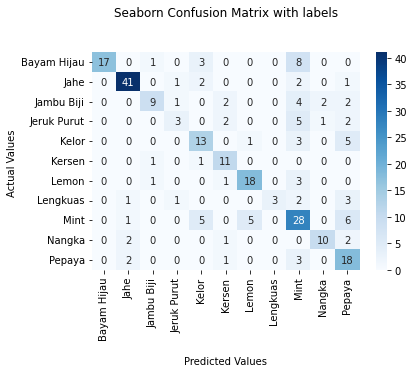

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from shutil import copyfile
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, test_gen):
  evaluate = model.evaluate(test_gen)
  print('Loss of the model is - ', evaluate[0])
  print('Accuracy of the model is - ', evaluate[1]*100, '%')

  classes =  list(test_gen.class_indices.keys())
  Y_pred = model.predict(test_gen)
  y_pred = np.argmax(Y_pred, axis=1)
  
  print(classification_report(test_gen.classes, y_pred, target_names=classes))
  print('Confusion Matrix')
  conf_matrix = confusion_matrix(test_gen.classes, y_pred)
  df_cm = pd.DataFrame(conf_matrix, index = classes, columns = classes)
  ax = sns.heatmap(df_cm, annot=True, cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ## Ticket labels - List must be in alphabetical order

evaluate_model(model, test_generator)

In [33]:
# # X_test, y_test = test_generator.next()
# # print('Loss of the model is - ', model.evaluate(X_test, y_test)[0])
# # print('Accuracy of the model is - ', model.evaluate(X_test, y_test)[1]*100, '%')
# evaluate = model.evaluate(test_generator)
# print('Loss of the model is - ', evaluate[0])
# print('Accuracy of the model is - ', evaluate[1]*100, '%')

In [68]:
def load_image(img_path, show=False):

    img = load_img(img_path, target_size=(224, 224))
    img_tensor = img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

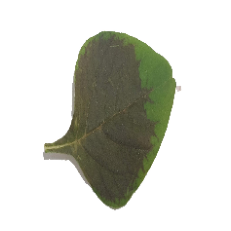

Bayam Hijau


In [70]:
label_map = (train_generator.class_indices)
label_map = {v: k for k, v in label_map.items()}
image_path ='/content/drive/Shareddrives/Bangkit Capstone/Segmented Medicinal Leaf Images/test/Bayam Hijau/AV-S-021.jpg'
image = load_image(image_path, show=True)
print(label_map[np.argmax(model.predict(image))])

In [ ]:
image = load_img('/content/Segmented Medicinal Leaf Images/test/Bayam Hijau/AV-S-009.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7EFCCAC16990>
